# Projeto Analise Exploratória de Dados - Python

## Grupo:
Thais Saori Yoshidome Vieira<br>
Vanessa Lazarin de Souza<br>
Daniel Ribeiro Gulgielmin<br>
Giuliano C Oliveira

### <b>Grupo analisando duas fontes de dados distintas antes de decidir qual prosseguir.</b>

# Fonte de Dados # 1 - Agência Nacional de Petróleo - Brasil - Base Histórica de Preços de Combustíveis
Fonte de dados utilizada: https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis

Metadados: https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/metadados-serie-historica-precos-combustiveis-1.pdf

Alternativa encontrada no Kaggle: https://www.kaggle.com/datasets/paulogladson/anp-combustveis/data

In [67]:
## Inserir aqui a lista de todas as bibliotecas necessárias para manipulação dos dados

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
#Read file using pandas

df1 = pd.read_csv('arquivos/Preços semestrais - AUTOMOTIVOS_2023.01.csv', sep=';')
df2 = pd.read_csv('arquivos/ca-2022-02.csv', sep=';')
df3 = pd.read_csv('arquivos/precos-semestrais-ca-2022-01.csv', sep=';')
# df4 = pd.read_csv('arquivos/ca-2021-02.csv', sep=';')
df5 = pd.read_csv('arquivos/ca-2021-01.csv', sep=';')

df = pd.concat([df1, df2, df3,  df5], ignore_index=True, sort=False)
df = df.set_axis(['REGIAO', 'ESTADO', 'MUNICIPIO', 'REVENDA', 'CNPJ', 'RUA', 'NUMERO', 'COMPLEMENTO', 'BAIRRO', 'CEP', 'PRODUTO', 'COLETA', 'VENDA', 'COMPRA', 'UNIDADE', 'BANDEIRA'], axis =1)


In [69]:
df['VENDA'] = df['VENDA'].replace(',','.', regex=True).astype(float)
display(df)

,REGIAO,ESTADO,MUNICIPIO,REVENDA,CNPJ,RUA,NUMERO,COMPLEMENTO,BAIRRO,CEP,PRODUTO,COLETA,VENDA,COMPRA,UNIDADE,BANDEIRA
0,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,ETANOL,03/01/2023,3.39,NaN,R$ / litro,BRANCA
1,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,DIESEL S10,03/01/2023,6.21,NaN,R$ / litro,BRANCA
2,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,GASOLINA,03/01/2023,4.39,NaN,R$ / litro,BRANCA
3,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,ETANOL,02/01/2023,3.89,NaN,R$ / litro,VIBRA ENERGIA
4,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,DIESEL,02/01/2023,6.49,NaN,R$ / litro,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673754,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,23.797.660/0001-40,AVENIDA CORONEL VENANCIO FLORES,28,NaN,CENTRO,29190-010,GASOLINA,28/06/2021,5.67,NaN,R$ / litro,RAIZEN
1673755,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,23.797.660/0001-40,AVENIDA CORONEL VENANCIO FLORES,28,NaN,CENTRO,29190-010,ETANOL,28/06/2021,4.79,NaN,R$ / litro,RAIZEN
1673756,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,23.797.660/0001-40,AVENIDA CORONEL VENANCIO FLORES,28,NaN,CENTRO,29190-010,DIESEL,28/06/2021,4.19,NaN,R$ / litro,RAIZEN
1673757,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,23.797.660/0001-40,AVENIDA CORONEL VENANCIO FLORES,28,NaN,CENTRO,29190-010,GASOLINA ADITIVADA,28/06/2021,5.67,NaN,R$ / litro,RAIZEN


In [70]:
df = df.drop(columns=['MUNICIPIO', 'REVENDA', 'RUA', 'NUMERO','COMPLEMENTO','CEP','BAIRRO'])

In [71]:
df['COLETA'] = pd.to_datetime(df['COLETA'],format="mixed", dayfirst=True)
df.sort_values(by='COLETA', ascending=False)

,REGIAO,ESTADO,CNPJ,PRODUTO,COLETA,VENDA,COMPRA,UNIDADE,BANDEIRA
430173,NE,BA,04.909.369/0002-53,ETANOL,2023-06-30,4.440,NaN,R$ / litro,BRANCA
414395,CO,GO,05.634.368/0001-25,DIESEL S10,2023-06-30,4.990,NaN,R$ / litro,BRANCA
414379,CO,GO,01.941.841/0001-66,DIESEL S10,2023-06-30,4.880,NaN,R$ / litro,VIBRA ENERGIA
414380,CO,GO,01.941.841/0001-66,GASOLINA,2023-06-30,5.640,NaN,R$ / litro,VIBRA ENERGIA
414515,CO,GO,01.135.706/0001-23,GASOLINA,2023-06-30,5.670,NaN,R$ / litro,RAIZEN
...,...,...,...,...,...,...,...,...,...
1339287,S,RS,89.774.699/0002-31,DIESEL,2021-01-01,3.449,NaN,R$ / litro,BRANCA
1339286,S,RS,89.774.699/0002-31,GASOLINA,2021-01-01,4.469,NaN,R$ / litro,BRANCA
1339285,S,RS,11.272.674/0001-61,DIESEL S10,2021-01-01,3.439,NaN,R$ / litro,BRANCA
1339284,S,RS,11.272.674/0001-61,GASOLINA ADITIVADA,2021-01-01,4.469,NaN,R$ / litro,BRANCA


In [72]:
# df['DIA'] = df['COLETA'].dt.day
df['MES'] = df['COLETA'].dt.month
df['ANO'] = df['COLETA'].dt.year
df['DATA'] = df['ANO'].astype(str) + '-' +df['MES'].astype(str)

# df['DATA']= pd.to_datetime(df['MES'] + df['ANO'], format='%m-%Y')

In [73]:
df['PRODUTO'].unique()


array(['ETANOL', 'DIESEL S10', 'GASOLINA', 'DIESEL', 'GASOLINA ADITIVADA',
       'GNV'], dtype=object)

In [ ]:
df

In [74]:
df['DATA'].dtypes

dtype('O')

In [75]:
gasolina = df[df['PRODUTO'] == 'GASOLINA']
gas_statisct = gasolina.groupby(['DATA', 'MES','ANO'])['VENDA'].agg(['min','max','mean','std']).reset_index()
# gas_statisct

In [76]:
etanol = df[df['PRODUTO'] == 'ETANOL']
etanol_stat = etanol.groupby(['DATA', 'MES','ANO'])['VENDA'].agg(['min','max','mean','std']).reset_index()
# etanol_stat

In [77]:
gnv = df[df['PRODUTO'] == 'GNV']
gnv_stat = gnv.groupby(['DATA', 'MES','ANO'])['VENDA'].agg(['min','max','mean','std']).reset_index()


In [78]:
diesel = df[df['PRODUTO'] == 'DIESEL']
diesel_stat = diesel.groupby(['DATA', 'MES','ANO'])['VENDA'].agg(['min','max','mean','std']).reset_index()

In [95]:
diesel10 = df[df['PRODUTO'] == 'DIESEL S10']
diesel10_stat = diesel10.groupby(['DATA', 'MES','ANO'])['VENDA'].agg(['min','max','mean','std']).reset_index()
# diesel10_stat

In [96]:
gasolinaadit = df[df['PRODUTO'] == 'GASOLINA ADITIVADA']
gasolinaadit_stat = gasolinaadit.groupby(['DATA', 'MES','ANO'])['VENDA'].agg(['min','max','mean','std']).reset_index()
# gasolinaadit_stat

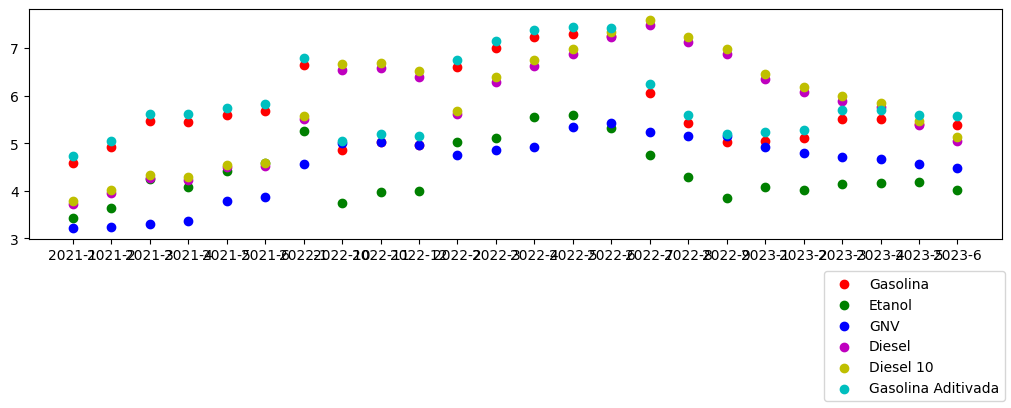

In [94]:
fig, ax = plt.subplots(figsize=(10, 4), layout='constrained')

plt.scatter(gas_statisct['DATA'], gas_statisct['mean'], color='r',  marker = 'o', label = 'Gasolina')
plt.scatter(etanol_stat['DATA'], etanol_stat['mean'], color='g', marker = 'o', label = 'Etanol')
plt.scatter(gnv_stat['DATA'], gnv_stat['mean'], color='b', marker = 'o', label = 'GNV')
plt.scatter(diesel_stat['DATA'], diesel_stat['mean'], color='m', marker = 'o', label = 'Diesel')
plt.scatter(diesel10_stat['DATA'], diesel10_stat['mean'], color='y', marker = 'o', label = 'Diesel 10')
plt.scatter(gasolinaadit_stat['DATA'], gasolinaadit_stat['mean'], color='c', marker = 'o', label = 'Gasolina Aditivada')

fig.legend(loc='outside lower right')
plt.show()

# ax = fig.add_subplot(111)
# for i, v in enumerate( gas_statisct['mean']):
#     ax.annotate(str(v), xy=(i,v), xytext=(-7,7), textcoords= 'offset points')


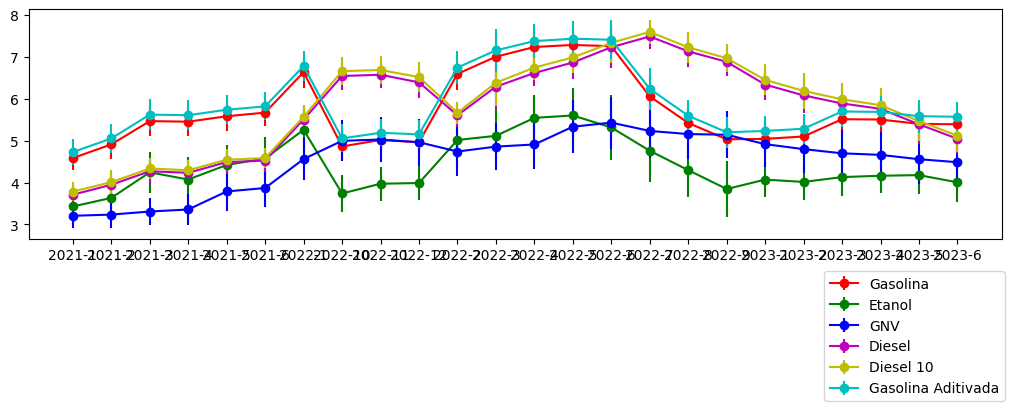

In [98]:
fig, ax = plt.subplots(figsize=(10, 4), layout='constrained')

plt.errorbar(gas_statisct['DATA'], gas_statisct['mean'], gas_statisct['std'] , color='r',  marker = 'o', label = 'Gasolina')
plt.errorbar(etanol_stat['DATA'], etanol_stat['mean'], etanol_stat['std'] , color='g', marker = 'o', label = 'Etanol')
plt.errorbar(gnv_stat['DATA'], gnv_stat['mean'], gnv_stat['std'] , color='b', marker = 'o', label = 'GNV')
plt.errorbar(diesel_stat['DATA'], diesel_stat['mean'], diesel_stat['std'] , color='m', marker = 'o', label = 'Diesel')
plt.errorbar(diesel10_stat['DATA'], diesel10_stat['mean'], diesel10_stat['std'] , color='y', marker = 'o', label = 'Diesel 10')
plt.errorbar(gasolinaadit_stat['DATA'], gasolinaadit_stat['mean'], gasolinaadit_stat['std'] , color='c', marker = 'o', label = 'Gasolina Aditivada')

fig.legend(loc='outside lower right')
plt.show()

# ax = fig.add_subplot(111)
# for i, v in enumerate( gas_statisct['mean']):
#     ax.annotate(str(v), xy=(i,v), xytext=(-7,7), textcoords= 'offset points')
